In [265]:
# Upgrade dependencies
! pip install -q pip==21.3.1
! pip install -q pandas==1.1.5
! pip install -q scikit-learn==0.23.2
! pip install -q nltk==3.4.4
! pip install -q matplotlib==3.3.4
! pip install -q numpy==1.19.5

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.23.2 which is incompatible.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p38/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anacon

## 1. <a name="1">Read the datasets</a>

Let's read the datasets into dataframes, using [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

In [341]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('../../data/open_data_rating_score/train.csv', sep='|')
test_data = pd.read_csv('../../data/open_data_rating_score/test.csv', sep='|')

print('The shape of the training dataset is:', df.shape)
print('The shape of the test dataset is:', test_data.shape)

The shape of the training dataset is: (7520, 31)
The shape of the test dataset is: (1880, 30)


## 2. <a name="2">Data Processing</a>

### 2.1 <a name="21">Exploratory Data Analysis</a>


In [342]:
# Print the first five rows
# NaN means missing data
df.head()

,sfid,dt_rif,juridical_form,dossier_type,application_source,credimi_industry,region,zone,revenues,pfn_ebitda,...,slope_al_accordato_operativo_sistema,slope_al_utilizzo_sistema,slope_al_sconfino_sistema,slope_scad_accordato_operativo_sistema,slope_scad_utilizzo_sistema,slope_scad_sconfino_sistema,slope_rev_accordato_operativo_sistema,slope_rev_utilizzo_sistema,slope_rev_sconfino_sistema,gender
0,a1Q7R00000eiXcbUAE,2021-10-07,SN,F,D,FOOD_AND_BEVERAGES,LIGURIA,N-W,NaN,NaN,...,-0.427516,1.155419,0.000000,0.087516,-0.340000,0.000000,0.000000,-0.006677,0.508290,M
1,a1Q2X00000ZARoVUAX,2020-03-24,RS,S,D,SERVICES,LAZIO,C,132.0,-1.6670,...,-25.381809,7.030049,-22.233850,-5.869132,3.402050,3.075468,21.674122,-10.247544,-3.023080,M
2,a1Q7R00000ZWIfjUAH,2020-11-05,SR,F,D,CONSTRUCTION,LAZIO,C,NaN,NaN,...,1.523189,-15.882350,12.401150,11.530694,6.835563,4.499724,19.697716,2.123602,-15.979714,F
3,a1Q2X00000ZEZZlUAP,2020-05-18,SR,F,D,MECHANICS,VENETO,N-E,3913.0,0.4693,...,5.506611,1.736408,-2.902523,-2.798806,-6.996783,5.972703,14.811891,13.726678,-6.910094,M
4,a1Q7R00000eiTipUAE,2021-09-24,SR,F,D,AGRICOLTURE,LOMBARDIA,N-W,1066.0,1.5030,...,13.376804,18.034658,1.379611,-1.782299,-16.781079,6.831352,-1.187466,10.233442,4.382520,M


In [343]:
test_data.head()

,sfid,dt_rif,juridical_form,dossier_type,application_source,credimi_industry,region,zone,revenues,pfn_ebitda,...,slope_al_accordato_operativo_sistema,slope_al_utilizzo_sistema,slope_al_sconfino_sistema,slope_scad_accordato_operativo_sistema,slope_scad_utilizzo_sistema,slope_scad_sconfino_sistema,slope_rev_accordato_operativo_sistema,slope_rev_utilizzo_sistema,slope_rev_sconfino_sistema,gender
0,a1Q2X00000XcAcwUAF,2020-02-06,SR,D,D,PUBLISHING,LOMBARDIA,N-W,1618.0,-2.7260,...,2.099893,1.192427,-12.091542,-13.987207,-5.126181,3.066458,10.090473,-8.318733,-15.517977,F
1,a1Q7R00000ZWGilUAH,2020-10-21,SR,F,D,DISTRIBUTION,VENETO,N-E,400.0,-0.9091,...,6.008899,11.914642,8.693902,-0.720071,-11.443282,-0.443012,20.210193,-4.209426,2.200767,M
2,a1Q2X00000XcXBUUA3,2020-03-06,SP,D,R,SERVICES,LOMBARDIA,N-W,9053.0,1.1540,...,13.280918,-13.487311,-11.603003,6.583607,-6.161804,15.845791,-12.474371,4.638267,8.879181,F
3,a1Q7R00000a3GGvUAM,2021-07-13,SR,F,R,SERVICES,PIEMONTE,N-W,1759.0,22.1000,...,5.809308,-6.131548,2.722105,8.745116,-3.302940,14.459201,2.894860,-13.585654,-3.861922,F
4,a1Q7R00000ZWWU5UAP,2021-02-24,AS,F,R,SERVICES,LOMBARDIA,N-W,NaN,NaN,...,-13.146411,8.421855,2.112119,-1.209326,5.145283,7.103512,4.168852,-5.934604,2.014968,M


In [344]:
print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (7520, 31)


In [345]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7520 entries, 0 to 7519
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sfid                                    7520 non-null   object 
 1   dt_rif                                  7520 non-null   object 
 2   juridical_form                          7520 non-null   object 
 3   dossier_type                            7520 non-null   object 
 4   application_source                      7520 non-null   object 
 5   credimi_industry                        7512 non-null   object 
 6   region                                  7520 non-null   object 
 7   zone                                    7520 non-null   object 
 8   revenues                                4942 non-null   float64
 9   pfn_ebitda                              4938 non-null   float64
 10  pn                                      4942 non-null   floa

In [346]:
# This prints basic statistics for numerical columns
df.describe()

,revenues,pfn_ebitda,pn,ebitda,target,score_accounting,score_identity,score_trend,slope_ebit,slope_fondi,...,slope_liquidita,slope_al_accordato_operativo_sistema,slope_al_utilizzo_sistema,slope_al_sconfino_sistema,slope_scad_accordato_operativo_sistema,slope_scad_utilizzo_sistema,slope_scad_sconfino_sistema,slope_rev_accordato_operativo_sistema,slope_rev_utilizzo_sistema,slope_rev_sconfino_sistema
count,4942.000000,4938.000000,4942.000000,4942.000000,7520.000000,7512.000000,7512.000000,7512.000000,7520.000000,7520.000000,...,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000,7520.000000
mean,2485.358964,0.630301,415.893161,164.067989,0.148138,-1.607050,-1.325157,-0.697493,4.734779,-4.820246,...,12.538006,0.247947,-0.076802,-0.016875,-0.040428,0.461849,0.031238,0.113880,-0.071078,0.156827
std,5000.359607,9.982648,1146.823945,358.646283,0.355261,2.290822,0.618856,1.010746,71.899990,25.257749,...,42.759721,10.008393,9.826011,9.836490,9.840753,9.953560,9.982610,9.920739,9.834800,9.905183
min,0.000000,-386.300000,-5436.000000,-8084.000000,0.000000,-9.560153,-2.808865,-3.000000,-4579.000000,-1212.000000,...,-572.000000,-37.639472,-38.574762,-37.075437,-41.645928,-38.511050,-38.316439,-42.767392,-36.374467,-34.974449
25%,422.000000,-0.809950,46.000000,29.000000,0.000000,-1.477622,-1.748158,-1.100000,-2.000000,-10.539680,...,3.000000,-6.206669,-6.705459,-6.591121,-6.536082,-6.090554,-6.691975,-6.418623,-6.707536,-6.251640
50%,1033.000000,-0.095240,120.000000,68.000000,0.000000,-1.027107,-1.297814,-0.750000,4.782012,-3.788058,...,10.767243,0.262106,0.000000,0.000000,-0.016219,0.120118,0.000000,0.000000,-0.045108,0.000000
75%,2546.500000,1.594500,366.000000,172.000000,0.000000,-0.161538,-0.867523,0.100000,12.316797,1.010022,...,18.667934,6.730244,6.541054,6.575466,6.354090,7.044169,6.819353,6.754603,6.493463,6.741523
max,117000.000000,313.500000,28170.000000,7126.000000,1.000000,1.086070,0.110498,0.800000,1391.500000,569.000000,...,1556.500000,36.497353,35.248913,42.276358,41.042655,36.244325,39.881057,41.495603,41.767689,39.754833


#### Target distribution

Let's check our target distribution.

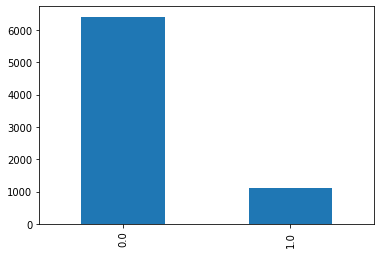

In [347]:
%matplotlib inline
import matplotlib.pyplot as plt

df['target'].value_counts().plot.bar()
plt.show()

In [541]:
# Checking the extent of imbalance
class_id_distribution = df['target'].value_counts()
print(class_id_distribution)

0.0    6406
1.0    1114
Name: target, dtype: int64


In [542]:
# Improving the imbalance
train_df_sample_class_1 = df[df['target'] == 1]
train_df_sample_class_0 = df[df['target'] == 0][:1114]
print(train_df_sample_class_1.shape)
print(train_df_sample_class_0.shape)
df = pd.concat([train_df_sample_class_1, train_df_sample_class_0])
print(df.shape)

(1114, 31)
(1114, 31)
(2228, 31)


#### Dataset features

Let's now print the features of our dataset.

In [543]:
import numpy as np                    
# use this for datasets with more columns, to print all columns
# (beware, if might raise memory errors when trying to print the text features values!)
# np.set_printoptions(threshold=np.inf) 

# This prints the column labels of the dataframe
print('All dataset columns:')
print(df.columns.values)

numerical_features = df.select_dtypes(include=np.number).columns.values.tolist()
categorical_features = df.select_dtypes(include='object').columns.values.tolist()

# This prints the column labels of the features identified as numerical
print('Numerical features:')
print(numerical_features)

# This prints the column labels of the features identified as numerical
print('Categorical features:')
print(categorical_features)

print('Number of numerical features:')
print(len(numerical_features))
print('Number of categorical features:')
print(len(categorical_features))

All dataset columns:
['sfid' 'dt_rif' 'juridical_form' 'dossier_type' 'application_source'
 'credimi_industry' 'region' 'zone' 'revenues' 'pfn_ebitda' 'pn' 'ebitda'
 'target' 'score_accounting' 'score_identity' 'score_trend' 'slope_ebit'
 'slope_fondi' 'slope_ebitda' 'slope_fatturato' 'slope_liquidita'
 'slope_al_accordato_operativo_sistema' 'slope_al_utilizzo_sistema'
 'slope_al_sconfino_sistema' 'slope_scad_accordato_operativo_sistema'
 'slope_scad_utilizzo_sistema' 'slope_scad_sconfino_sistema'
 'slope_rev_accordato_operativo_sistema' 'slope_rev_utilizzo_sistema'
 'slope_rev_sconfino_sistema' 'gender']
Numerical features:
['revenues', 'pfn_ebitda', 'pn', 'ebitda', 'target', 'score_accounting', 'score_identity', 'score_trend', 'slope_ebit', 'slope_fondi', 'slope_ebitda', 'slope_fatturato', 'slope_liquidita', 'slope_al_accordato_operativo_sistema', 'slope_al_utilizzo_sistema', 'slope_al_sconfino_sistema', 'slope_scad_accordato_operativo_sistema', 'slope_scad_utilizzo_sistema', 'slope_

### 2.2 <a name="22">Select features to build the model</a>

This time we build a model using all features. That is, we build a classifier including numerical and categorical features. 

In [544]:
if 'target' in numerical_features:
    numerical_features.remove('target')
if 'sfid' in categorical_features:
    categorical_features.remove('sfid')
if 'dt_rif' in categorical_features:
    categorical_features.remove('dt_rif')
model_features = numerical_features + categorical_features
model_target = 'target'

### 2.3 <a name="23">Data Preprocessing (Cleaning)</a>

Before data processing, we first clean the dataset.


__Missing Numerical Values__. Let's check missing values for these numerical features.

In [545]:
print(df[numerical_features].isna().sum())

revenues                                  818
pfn_ebitda                                819
pn                                        818
ebitda                                    818
score_accounting                            5
score_identity                              5
score_trend                                 5
slope_ebit                                  0
slope_fondi                                 0
slope_ebitda                                0
slope_fatturato                             0
slope_liquidita                             0
slope_al_accordato_operativo_sistema        0
slope_al_utilizzo_sistema                   0
slope_al_sconfino_sistema                   0
slope_scad_accordato_operativo_sistema      0
slope_scad_utilizzo_sistema                 0
slope_scad_sconfino_sistema                 0
slope_rev_accordato_operativo_sistema       0
slope_rev_utilizzo_sistema                  0
slope_rev_sconfino_sistema                  0
dtype: int64


As a quick fix, we will apply mean imputation. This will replace the missing values with the mean value of the corresponding column.

In [546]:
# Perform convert to string operation on training and test datasets
df[categorical_features] = df[categorical_features].astype('str')
test_data[categorical_features] = test_data[categorical_features].astype('str')

In [547]:
for c in categorical_features:
    print(c)
    print(df[c].unique()) #value_counts())

juridical_form
['SR' 'CO' 'RS' 'DI' 'SN' 'AS' 'SP' 'SU' 'SC' 'AU' 'CL' 'PS' 'SO' 'SL'
 'OO']
dossier_type
['F' 'D' 'C' 'S' 'L']
application_source
['D' 'R' 'P' '-' 'L' 'B' 'C']
credimi_industry
['CONSTRUCTION' 'TRANSPORTATION_MEANS' 'TRANSPORTATION_SERVICES'
 'DISTRIBUTION' 'SERVICES' 'MECHANICS' 'CHEMISTRY' 'FOOD_AND_BEVERAGES'
 'METALLURGY_AND_STEEL_PRODUCTS' 'FASHION' 'AGRICOLTURE'
 'OTHER_CONSUMER_GOODS' 'HOUSEHOLD_ELECTRICAL_APPLIANCES' 'PUBLISHING'
 'INTERMEDIATE_GOODS_FOR_PRODUCTION'
 'ELECTRONICS_AND_ELECTRICAL_ENGINEERING' 'FURNITURE' 'CONSUMER_GOODS'
 'nan' 'ENERGY_AND_EXTRACTION' 'FINANCIAL_HOLDINGS' 'PHARMACEUTICAL']
region
['LAZIO' 'CAMPANIA' 'SICILIA' 'LOMBARDIA' 'EMILIA-ROMAGNA' 'VENETO'
 'CALABRIA' 'MOLISE' 'PUGLIA' 'TOSCANA' 'PIEMONTE' 'MARCHE' 'LIGURIA'
 'SARDEGNA' 'TRENTINO-ALTO ADIGE' 'ABRUZZO' 'UMBRIA'
 'FRIULI-VENEZIA GIULIA' 'BASILICATA' "VALLE D'AOSTA"]
zone
['C' 'S' 'I' 'N-W' 'N-E']
gender
['F' 'M']


Converting categoricals into useful numerical features, will also have to wait until after the train/test split.

### 2.4 <a name="24">Train - Validation - Test Datasets</a>

We plan to use the k-fold cross-validation, so we simply use the training and test datasets that we read from the data files. Train-test splits can be performed using sklearn's train_test_split() function.

In [548]:
# Set the training data as our df
train_data = df

from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(df, test_size=0.15, shuffle=True, random_state=23)

# Print the shapes of the Train - Validation - Test Datasets
print('Train - Validation - Test Datasets shapes: ', train_data.shape, val_data.shape, test_data.shape)

Train - Validation - Test Datasets shapes:  (1893, 31) (335, 31) (1880, 30)


### 2.5 <a name="25">Data processing with Pipeline and ColumnTransformer</a>

Let's build a more complex pipeline today. We first build separate pipelines to handle the numerical and categorical features, and then combine them into a composite pipeline along with an estimator.
   
The selective preparations of the dataset features are then put together into a collective 
__ColumnTransformer__, to be finally used in a Pipeline along with an estimator. This ensures that the transforms are performed automatically on the raw data when fitting the model and when making predictions, such as when evaluating the model on a validation dataset via cross-validation or making predictions on a test dataset in the future.

In [549]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler()) # Shown in case is needed, not a must with Decision Trees
                                ])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
                                ])

# Combine all data preprocessors from above (add more, if you choose to define more!)
# For each processor/step specify: a name, the actual process, and finally the features to be processed
data_processor = ColumnTransformer([
    ('numerical_processing', numerical_processor, numerical_features),
    ('categorical_processing', categorical_processor, categorical_features)]) 

# Visualize the data processing pipeline
from sklearn import set_config
set_config(display='diagram')
data_processor


ColumnTransformer(transformers=[('numerical_processing',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('num_scaler',
                                                  MinMaxScaler())]),
                                 ['revenues', 'pfn_ebitda', 'pn', 'ebitda',
                                  'score_accounting', 'score_identity',
                                  'score_trend', 'slope_ebit', 'slope_fondi',
                                  'slope_ebitda', 'slope_fatturato',
                                  'slope_liquidita',
                                  'slope_al_accordato_operativo_sistema',
                                  'slope_a...
                                  'slope_rev_accordato_operativo_sistema',
                                  'slope_rev_utilizzo_sistema',
                                  'slope_rev_sconfino_sistema']),
                                ('categorical_processing',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['juridical_form', 'dossier_type',
                                  'application_source', 'credimi_industry',
                                  'region', 'zone', 'gender'])])

## 3. <a name="3">Train (and Tune) a Classifier</a>


In [570]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, make_scorer, recall_score

### PIPELINE ###
################

# Pipeline desired all data transformers, along with an estimator at the end
pipeline = Pipeline([
    ('data_processing', data_processor),
#     ('dt', DecisionTreeClassifier(class_weight = 'balanced'))
    ('dt', RandomForestClassifier(max_depth=15, n_estimators = 200, bootstrap = False, class_weight = 'balanced_subsample'))
#     ('lg', LogisticRegression(solver='newton-cg', penalty='l2', C=1, class_weight= 'balanced'))
                    ])


### Model Training

We train the classifier with __.fit()__ on our training dataset. 

In [571]:
# Get train data to train the classifier
X_train = train_data[model_features]
y_train = train_data[model_target]

# Fit the classifier to the train data
# Train data going through the Pipeline it's imputed (with means from the train data), 
#   scaled (with the min/max from the train data), 
#   and finally used to fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['revenues', 'pfn_ebitda',
                                                   'pn', 'ebitda',
                                                   'score_accounting',
                                                   'score_identity',
                                                   'score_trend', 'slope_ebit',
                                                   'slope_fondi',
                                                   'slope_ebitda',
                                                   'slope_fatturato',
                                                   'slope_liquidita',
                                                   'slope_al_ac...
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['juridical_form',
                                                   'dossier_type',
                                                   'application_source',
                                                   'credimi_industry', 'region',
                                                   'zone', 'gender'])])),
                ('dt',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced_subsample',
                                        max_depth=15, n_estimators=200))])

Let's now evaluate the performance of the trained classifier, on the training and the test datasets. We use __.predict()__ this time. 


In [572]:

# Use the fitted model to make predictions on the train dataset
# Train data going through the Pipeline it's imputed (with means from the train data), 
#   scaled (with the min/max from the train data), 
#   and finally used to make predictions
train_predictions = pipeline.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[951   0]
 [  0 942]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       951
         1.0       1.00      1.00      1.00       942

    accuracy                           1.00      1893
   macro avg       1.00      1.00      1.00      1893
weighted avg       1.00      1.00      1.00      1893

Train accuracy: 1.0


In [573]:

# Get validation data to validate the classifier
X_val = val_data[model_features]
y_val = val_data[model_target]

# Use the fitted model to make predictions on the validation dataset
# Validation data going through the Pipeline it's imputed (with means from the train data), 
#   scaled (with the min/max from the train data), 
#   and finally used to make predictions
val_predictions = pipeline.predict(X_val)

print('Model performance on the validation set:')
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Validation accuracy:", accuracy_score(y_val, val_predictions))

Model performance on the validation set:
[[137  26]
 [ 26 146]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       163
         1.0       0.85      0.85      0.85       172

    accuracy                           0.84       335
   macro avg       0.84      0.84      0.84       335
weighted avg       0.84      0.84      0.84       335

Validation accuracy: 0.844776119402985


### Hyperparameter Tuning

We next use sklearn's RandomizedSearchCV to look for hyperparameter combinations to improve the accuracy on the test set (and reduce the generalization gap).

Also, Pipeline's steps names give easy access to hyperparameters for hyperparameter tuning while cross-validating. Parameters of the estimators in the pipeline can be accessed using the __estimator__ __ __parameter__ syntax.

In [575]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randInt

### HYPERPARAMETER SEARCH ###
########################################

# Parameter grid for GridSearch
param_grid={'dt__max_depth': sp_randInt(10,30), 
            'dt__n_estimators': sp_randInt(100,250)
           }

grid_search = RandomizedSearchCV(pipeline, # Base model
                           param_grid, # Parameters to try
                           cv = 5, # Apply 5-fold cross validation
                           verbose = 1, # Print summary
                           n_jobs = -1, # Use all available processors
                            n_iter = 10,
                           scoring = make_scorer(recall_score)
                          )


__Warning__: The .fit() process of GridSearchCV can take a long time to complete, depending on the parameter ranges selected!

In [576]:
# Fit the search to our training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   22.9s finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('data_processing',
                                              ColumnTransformer(transformers=[('numerical_processing',
                                                                               Pipeline(steps=[('num_imputer',
                                                                                                SimpleImputer()),
                                                                                               ('num_scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['revenues',
                                                                                'pfn_ebitda',
                                                                                'pn',
                                                                                'ebitda',
                                                                                'score_accounting',
                                                                                'score_identity',
                                                                                'score_trend',
                                                                                'slope_ebit',
                                                                                'slope_fondi',
                                                                                'slope_ebitda',
                                                                                'slope_fattura...
                                              RandomForestClassifier(bootstrap=False,
                                                                     class_weight='balanced_subsample',
                                                                     max_depth=15,
                                                                     n_estimators=200))]),
                   n_jobs=-1,
                   param_distributions={'dt__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f140a0ce0d0>,
                                        'dt__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f140a23c8b0>},
                   scoring=make_scorer(recall_score), verbose=1)

When the hyperparameter search is over, we can print the optimal combination of hyperparameters and the corresponding validation metric. We can also grab the best estimator equiped with the optimal combination of hyperparameters for further use. 

In [577]:
# Print the optimal hyperparameters and the corresponding best validation metric
print(grid_search.best_params_)
print(grid_search.best_score_)

{'dt__max_depth': 25, 'dt__n_estimators': 197}
0.8407745131149387


In [578]:
# Get the best model out of GridSearchCV
classifier = grid_search.best_estimator_

# Fit the best model to the train data once more
classifier.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numerical_processing',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['revenues', 'pfn_ebitda',
                                                   'pn', 'ebitda',
                                                   'score_accounting',
                                                   'score_identity',
                                                   'score_trend', 'slope_ebit',
                                                   'slope_fondi',
                                                   'slope_ebitda',
                                                   'slope_fatturato',
                                                   'slope_liquidita',
                                                   'slope_al_ac...
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['juridical_form',
                                                   'dossier_type',
                                                   'application_source',
                                                   'credimi_industry', 'region',
                                                   'zone', 'gender'])])),
                ('dt',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced_subsample',
                                        max_depth=25, n_estimators=197))])

## 4. <a name="4">Test the Classifier</a>

And now, let's evaluate the performance of the classifier on the val set.

Before that, let's first see how the model works on the training dataset.

In [579]:

# Use the fitted model to make predictions on the train dataset
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))     

Model performance on the train set:
[[951   0]
 [  0 942]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       951
         1.0       1.00      1.00      1.00       942

    accuracy                           1.00      1893
   macro avg       1.00      1.00      1.00      1893
weighted avg       1.00      1.00      1.00      1893

Train accuracy: 1.0


In [580]:

# Get validation data to validate the classifier
X_val = val_data[model_features]
y_val = val_data[model_target]

# Use the fitted model to make predictions on the validation dataset
# Validation data going through the Pipeline it's imputed (with means from the train data), 
#   scaled (with the min/max from the train data), 
#   and finally used to make predictions
val_predictions = classifier.predict(X_val)

print('Model performance on the validation set:')
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Validation accuracy:", accuracy_score(y_val, val_predictions))

Model performance on the validation set:
[[135  28]
 [ 23 149]]
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       163
         1.0       0.84      0.87      0.85       172

    accuracy                           0.85       335
   macro avg       0.85      0.85      0.85       335
weighted avg       0.85      0.85      0.85       335

Validation accuracy: 0.8477611940298507


In [581]:
# Find predictions for test_data
X_test = test_data[model_features]
# test_predictions = classifier.predict(X_test)
test_predictions = classifier.predict(X_test)

In [582]:
import pandas as pd

result_df = pd.DataFrame(columns=["sfid", "target"])
result_df["sfid"] = test_data["sfid"].tolist()
result_df["target"] = test_predictions

result_df.to_csv("../../data/open_data_rating_score/result.csv", index=False)